**Diagnostiquer la pneumonie à l'aide des rayons X**

Les radiographies permettent de voir les signes de pneumonie et ainsi de confirmer le diagnostic, ainsi que d'identifier le type et le stade de la maladie. Contrairement à d’autres méthodes de diagnostic, à l’efficacité prouvée, les radiographies sont plus accessibles. Cependant, comme les signes de pneumonie et d’autres maladies pulmonaires sur les radiographies sont similaires, ce type d’étude ne constitue qu’une partie d’un diagnostic complet.

Pour diagnostiquer, un spécialiste a besoin de:

Forme et taille des champs pulmonaires (dans les limites normales ou noter les écarts par rapport à la norme)
Les champs pulmonaires sont transparents ou des écarts par rapport à la norme sont détectés sous la forme de : ombres, dégagements, symptômes d'ombres mixtes.
Etude du profil pulmonaire (amélioré, appauvri ou normal)
Le modèle neuronal n'a pas besoin de ces données. Il ne nécessite pas un examen approfondi de l’image, le diagnostic sera annoncé instantanément. Mais vous devez d’abord le construire et le former. La base de notre modèle sera ResNet50, capable de traiter des problèmes d'un ordre de grandeur plus complexes que le nôtre.

In [ ]:

!pip install tensorflow==2.2.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.15.0rc0, 2.15.0rc1)
ERROR: No matching distribution found for tensorflow==2.2.0


#Import des librairies et fonctions nécessaires

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Chargement du dataset de kaggle


In [2]:
#importer le fichier kaggle.json qui contient le token
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rhilout","key":"5d683ee799949a189279998af108cf88"}'}

In [3]:
# déplacer kaggle.json dans la route .kaggle et définir les permissions du ficher.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# télécharger le dataset via le chemin kaggle.
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia



 99% 2.27G/2.29G [00:10<00:00, 247MB/s]
100% 2.29G/2.29G [00:10<00:00, 237MB/s]


In [5]:
# Décomprésser le dataset.
!unzip -q chest-xray-pneumonia.zip


In [6]:
#importer des images viral_pneumonia dans val
from google.colab import files
files.upload()

Saving Viral Pneumonia-1.png to Viral Pneumonia-1.png
Saving Viral Pneumonia-10.png to Viral Pneumonia-10.png
Saving Viral Pneumonia-100.png to Viral Pneumonia-100.png
Saving Viral Pneumonia-1000.png to Viral Pneumonia-1000.png
Saving Viral Pneumonia-1001.png to Viral Pneumonia-1001.png
Saving Viral Pneumonia-1002.png to Viral Pneumonia-1002.png
Saving Viral Pneumonia-1003.png to Viral Pneumonia-1003.png
Saving Viral Pneumonia-1004.png to Viral Pneumonia-1004.png
Saving Viral Pneumonia-1005.png to Viral Pneumonia-1005.png
Saving Viral Pneumonia-1006.png to Viral Pneumonia-1006.png


{'Viral Pneumonia-1.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01+\x00\x00\x01+\x08\x00\x00\x00\x00\xa3\xcf\xfah\x00\x00\x00\x07tIME\x07\xe5\x03\x06\n5\x0cN\x86\x0e\xd6\x00\x00 \x00IDATx\x9ct\xbdK\xaf\xb6[v\x156\xc6\x98\xeby\xf7\xde\xdf9\xa7\x8ar\x95/e\x831\xd8\x8e\x85\x00\x07\x12@\x04B\'\x02E\xb4 Q$\x1a\xa4\x91Fz\x91\xd2\x8f\xf2\x0f\xd2\x8c"\xa5\x91F\xa4(\x11B(HQ\xe8\x04\x81\x14\x89`\x85\x04\x9c8\\,\x1b;\xe0\x0b\xe5\xba_\xce\xe5\xfb\xf6~\x9f5\xc7Hc>\xfbT\xb9\xecl\xe9|\xd29\xdf\xde\xfb}\xdf\xf5\xac5\xe7\xb8\xcduH\x90\x00\xf8p+\xaa\x16\xab\xd6Z\xa5\xe3\x90\xb3n\xc7\xd3g>xb\xea\xf6\xb0"`\xbf\x9c\xf1=d@@\xa2d\x07*$\x06\xeb\x11\xddzz\xbf\x96\xa0\xb5\xf0\xeeL)Hl\xacU U%\x00\n\xa8Z\x05Q"@2\x1d\xdba\x91N\xc0n\x17\xc2*0\t\x11\xa4\x83\x98tb\xa3M a\xf6\xbd\xef\xddF\ng\xef\x97\xe7s\x7f\xf4\x95\xafwN!\xca\xbb\x17\xc1\x01\xde{\xc3\xb3i\x15\xa9zHD$U\x0c\r"I\xd8$\x82\xf6v\xdaF>\xf9\xfc\xbf\xfbo\xfe\xe7\x7f\xea\x93\xfa\\?\xfe\x99\xff\xf7[\xbf\xdf\x7f\xf7[\x0b\x00\x80\x88\x08\x00\x93\n8o\x83\

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# dataset = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'
# train_data_dir = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/train'
# test_data_dir = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/test'
# # validation_data_dir =




In [89]:
!rm -rf /chest_xray/train/PNEUMONIA/.ipynb_checkpoints


In [40]:
!rm -rf /chest_xray/val/PNEUMONIA/.ipynb_checkpoints


# Définir les paramètres

In [7]:
class_names = ['NORMAL', 'PNEUMONIA']
nb_classes = len(class_names)
image_size = (128, 128)
batch_size = 32


In [8]:


train_dir = './chest_xray/train'
validation_dir = './chest_xray/val'
test_dir = './chest_xray/test'



In [17]:

train_normal = len(os.listdir(os.path.join(train_dir, "NORMAL")))
train_pneumonia = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))

test_normal = len(os.listdir(os.path.join(test_dir, "NORMAL")))
test_pneumonia = len(os.listdir(os.path.join(test_dir, "PNEUMONIA")))

validation_normal = len(os.listdir(os.path.join(validation_dir, "NORMAL")))
validation_pneumonia = len(os.listdir(os.path.join(validation_dir, "PNEUMONIA")))

# Prévisualisation

<function matplotlib.pyplot.show(close=None, block=None)>

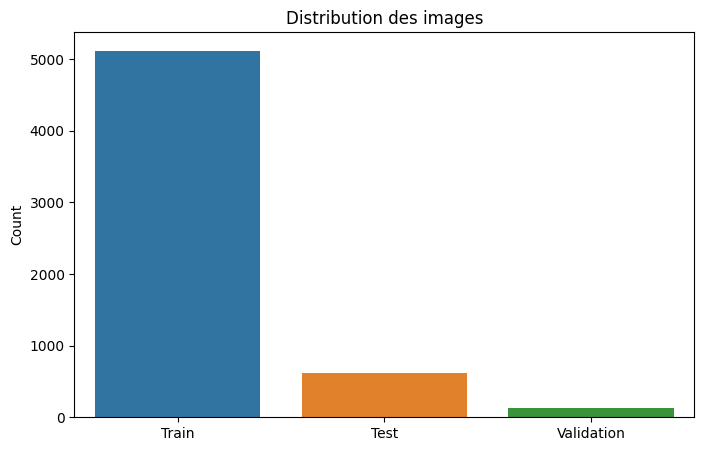

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Train", "Test", "Validation"], y=[train_normal + train_pneumonia, test_normal + test_pneumonia, validation_normal + validation_pneumonia])
plt.title("Distribution des images")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

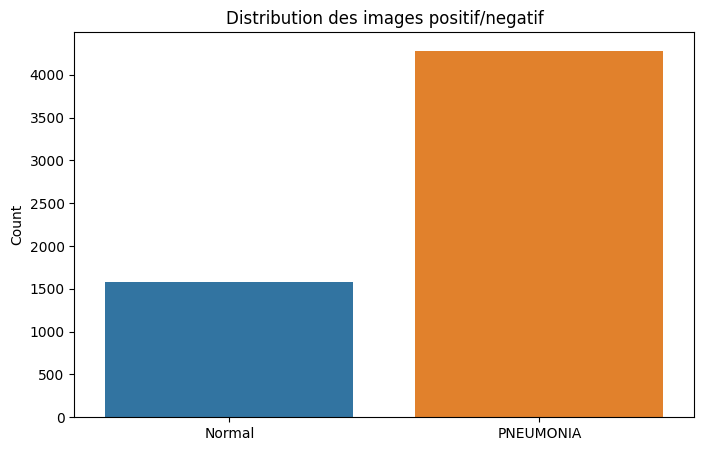

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Normal", "PNEUMONIA"], y=[train_normal + test_normal+ validation_normal, train_pneumonia + test_pneumonia + validation_pneumonia])
plt.title("Distribution des images positif/negatif")
plt.ylabel("Count")
plt.show

Nous constatons que le dataset est très **désequilibré**, nous allons procéder par des techniques afin de favoriser la classe minoritaire(NORMAL) par une data-augmentation enrichie et des parametres de poids diffents dans les algorithmes.

Visualisation d'images

In [12]:
# On copie les images de pneumonie dans une liste à partir du sous-dossier PNEUMONIA de train pour afficher
# quelques images aleatoirement.

from PIL import Image

train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")
train_pneumonia_images = os.listdir(train_pneumonia_dir)
train_pneumonia_liste = []

for image_file in train_pneumonia_images:
    image_path = os.path.join(train_pneumonia_dir, image_file)  # Utilisez train_pneumonia_dir ici
    with Image.open(image_path) as img:
        train_pneumonia_liste.append(img.copy())  # Ajoutez l'image à la liste



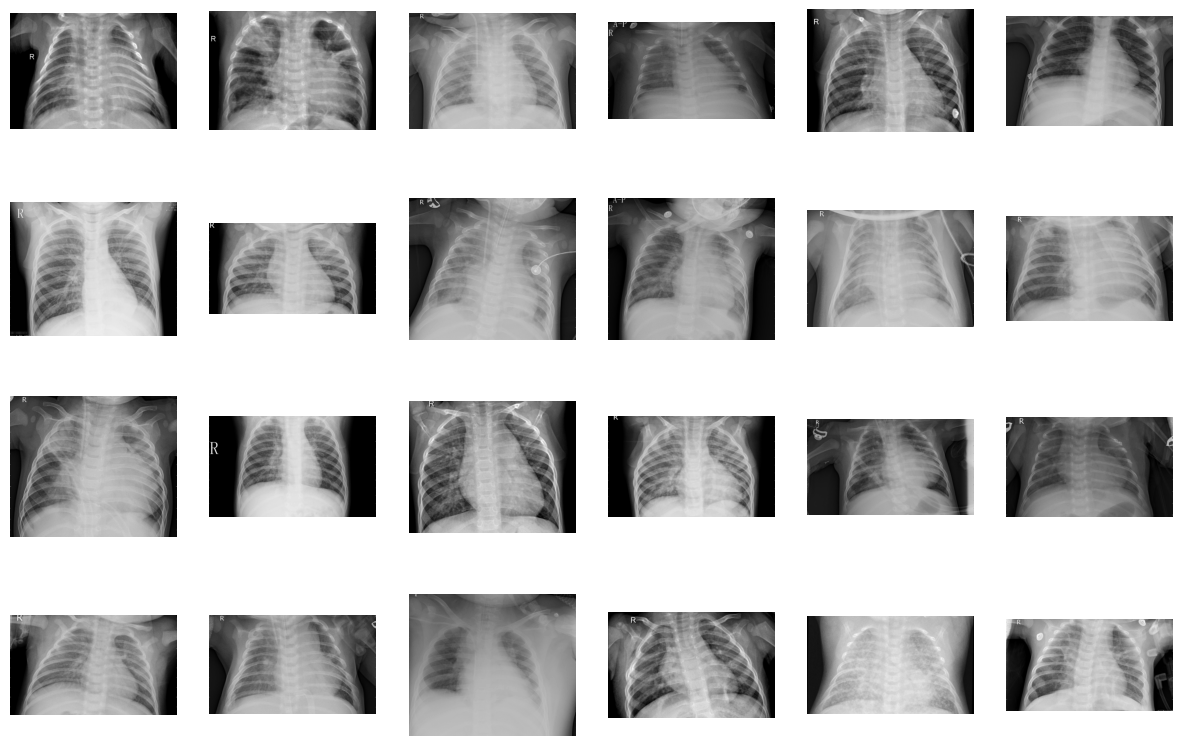

In [13]:

plt.figure(figsize=(15,15))

for n in range(24):
    index = np.random.randint(0, len(train_pneumonia_liste))  # Génère un indice aléatoire
    plt.subplot(6, 6, n+1)
    plt.imshow(train_pneumonia_liste[index], cmap='gray')  # Affiche l'image à l'indice aléatoire
    plt.axis("off")
plt.show()


# Preprocessing
# Augmentation et redimensionnement.
L'augmentation est très limitée dans ce cas car les images de radiographie sont standardisées. En outre, il est crucial de s'assurer que les augmentations appliquées ne modifient pas les caractéristiques cliniquement significatives des images. Par exemple, une rotation excessive pourrait rendre l'interprétation de l'image incorrecte ou induire des artefacts qui ne sont pas présents dans les images radiographiques naturelles.

Les augmentations telles que les rotations mineures, les retournements horizontaux ou verticaux, et les translations peuvent être utilisées, mais elles doivent être appliquées avec précaution.

In [ ]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# #

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])


# Génerateur d'images

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Redimensionnement
    rotation_range=10,  # Des rotations légères, en degrés
    width_shift_range=0.1,  # Décalages horizontaux
    height_shift_range=0.1,  # Décalages verticaux
    shear_range=0.1,  # Cisaillements légers
    zoom_range=0.1,  # Zooms légers
    fill_mode='nearest' # Remplir les pixels nouvellement créés suite à une rotation ou un déplacement(largeur/hauteur)
    )
test_val_datagen = ImageDataGenerator(rescale=1./255)   # Redimensionnement pour les images de test et validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size= batch_size,
    class_mode='binary')

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False ) #ne pas mélanger l'ordre des images afin de faciliter la vérification


Found 5115 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Construction des models


In [ ]:

# Model CNN sans augmentation
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [22]:
# Mode2 CNN avec augmentation
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3),activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

#Entrainnement des modèles

In [ ]:
# Model 1

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/30
326/326 [==============================] - 48s 142ms/step - loss: 0.3538 - accuracy: 0.8447 - val_loss: 0.4575 - val_accuracy: 0.8750
Epoch 2/30
326/326 [==============================] - 45s 139ms/step - loss: 0.1531 - accuracy: 0.9438 - val_loss: 0.5418 - val_accuracy: 0.7500
Epoch 3/30
326/326 [==============================] - 47s 143ms/step - loss: 0.1192 - accuracy: 0.9559 - val_loss: 0.5308 - val_accuracy: 0.7500
Epoch 4/30
326/326 [==============================] - 50s 153ms/step - loss: 0.1044 - accuracy: 0.9617 - val_loss: 0.2161 - val_accuracy: 0.9375
Epoch 5/30
326/326 [==============================] - 45s 138ms/step - loss: 0.0971 - accuracy: 0.9636 - val_loss: 0.5400 - val_accuracy: 0.8125
Epoch 6/30
326/326 [==============================] - 45s 139ms/step - loss: 0.0853 - accuracy: 0.9709 - val_loss: 0.5369 - val_accuracy: 0.8125
Epoch 7/30
326/326 [==============================] - 47s 143ms/step - loss: 0.0905 - accuracy: 0.9693 - val_loss: 0.5487 - val_ac

In [21]:
# equilibrer les classes
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes)
class_weights = dict(enumerate(class_weights))



# Entrainement du model2 CNN avec augmentation et équilibrage des classes

In [23]:
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,

    class_weight=class_weights)



Epoch 1/30
 68/159 [===========>..................] - ETA: 42s - loss: 0.6658 - accuracy: 0.5611

KeyboardInterrupt: ignored

Problème: le fit du model2 n'affiche plus la val_accuracy. Apès vérification, le genrateur de data_validation est correctement configuré. Le problème vient uniquement de l'environnement colab (version de tensorflow). Nous allons utilisez un callback pour afficher la val_accuracy : LambdaCallback imprime explicitement la val_accuracy après chaque époque.

In [26]:
for images, labels in validation_generator:
    print(images.shape, labels.shape)
    break  # Juste pour tester le premier lot

(32, 128, 128, 3) (32,)


In [25]:
from tensorflow.keras.callbacks import LambdaCallback

print_val_acc = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"val_accuracy: {logs['val_accuracy']}"))

history3 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=1,
    class_weight=class_weights,
    verbose=2, #verbose pour afficher la sortie (2 pour plus de détails)
    callbacks=[print_val_acc]  # Ajout du callback
)


Epoch 1/30
val_accuracy: 0.71875
159/159 - 76s - loss: 0.4200 - accuracy: 0.8076 - val_loss: 0.5600 - val_accuracy: 0.7188 - 76s/epoch - 475ms/step
Epoch 2/30
val_accuracy: 0.84375
159/159 - 74s - loss: 0.3045 - accuracy: 0.8674 - val_loss: 0.6486 - val_accuracy: 0.8438 - 74s/epoch - 465ms/step
Epoch 3/30
val_accuracy: 0.84375
159/159 - 74s - loss: 0.2478 - accuracy: 0.8944 - val_loss: 0.5050 - val_accuracy: 0.8438 - 74s/epoch - 464ms/step
Epoch 4/30
val_accuracy: 0.9375
159/159 - 72s - loss: 0.2359 - accuracy: 0.8985 - val_loss: 0.2318 - val_accuracy: 0.9375 - 72s/epoch - 450ms/step
Epoch 5/30
val_accuracy: 0.90625
159/159 - 70s - loss: 0.2184 - accuracy: 0.9109 - val_loss: 0.2621 - val_accuracy: 0.9062 - 70s/epoch - 442ms/step
Epoch 6/30
val_accuracy: 0.90625
159/159 - 71s - loss: 0.2230 - accuracy: 0.9085 - val_loss: 0.2102 - val_accuracy: 0.9062 - 71s/epoch - 445ms/step
Epoch 7/30
val_accuracy: 0.84375
159/159 - 70s - loss: 0.2087 - accuracy: 0.9176 - val_loss: 0.2061 - val_accurac

In [27]:
steps_per_epoch = train_generator.samples // batch_size
print(steps_per_epoch)


159


# Evaluation des modèles

In [ ]:
#accuracy premier model(sans equilirer les classes)
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples)
print('Test accuracy:', test_acc)


 39/624 [>.............................] - ETA: 1:16 - loss: 1.8374 - accuracy: 0.7885

624/624 [==============================] - 5s 8ms/step - loss: 1.8374 - accuracy: 0.7885
Test accuracy: 0.7884615659713745


39/39 [==============================] - 6s 127ms/step


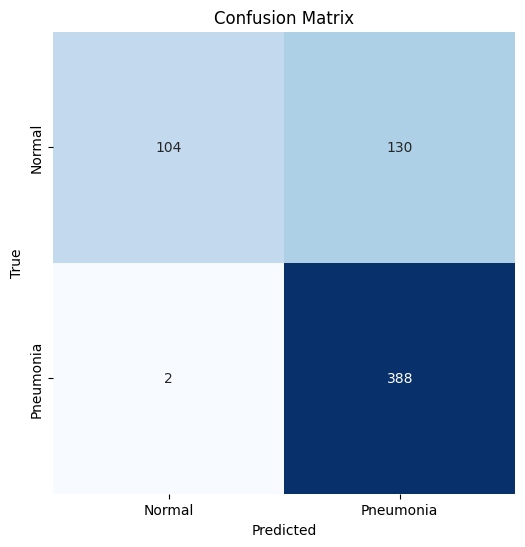

In [ ]:
# Results
# test_results = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
# print("Test Loss:", test_results[0])
# print("Test Accuracy:", test_results[1])

predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)

# print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='heatmap', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model2

In [ ]:
test_loss, test_acc = model2.evaluate(test_generator, steps=test_generator.samples)
print('Test accuracy:', test_acc)

 20/624 [..............................] - ETA: 6:19 - loss: 0.4095 - accuracy: 0.8558

624/624 [==============================] - 14s 20ms/step - loss: 0.4095 - accuracy: 0.8558
Test accuracy: 0.8557692170143127


20/20 [==============================] - 12s 511ms/step


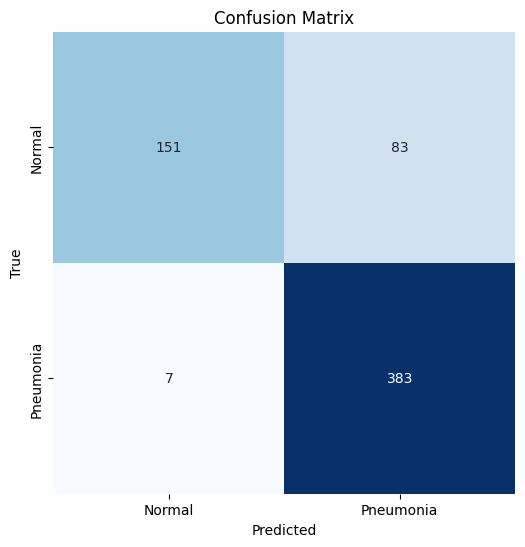

In [ ]:
predictions2 = model2.predict(test_generator)
y_pred = (predictions2 > 0.5).astype(int)

# print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
test_loss, test_acc = model2.evaluate(test_generator, steps=test_generator.samples)
print('Test accuracy:', test_acc)

 20/624 [..............................] - ETA: 2:16 - loss: 0.3140 - accuracy: 0.8846

624/624 [==============================] - 5s 7ms/step - loss: 0.3140 - accuracy: 0.8846
Test accuracy: 0.8846153616905212


20/20 [==============================] - 5s 220ms/step


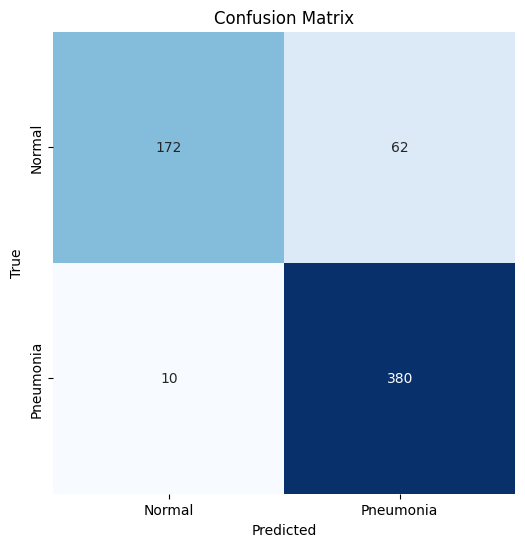

In [29]:
predictions2 = model2.predict(test_generator)
y_pred = (predictions2 > 0.5).astype(int)

# print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualisation de l'accuracy


model 1:

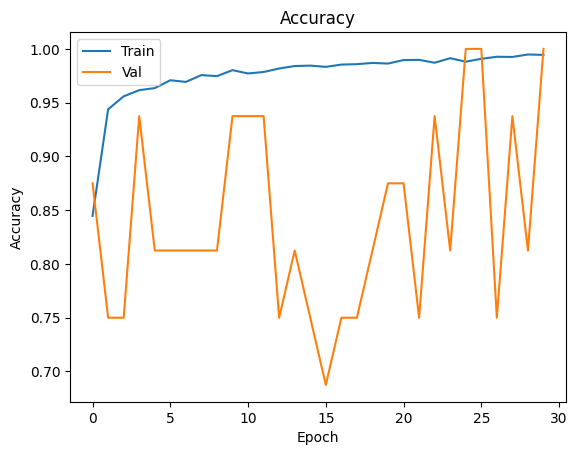

In [ ]:
# Visualisation accuracy premier model (sans equilibrer les classes)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


Model 2:

In [ ]:
val_accuracy = history3.history['val_accuracy']
print('Validation accuracy:', val_accuracy)


Validation accuracy: [0.9375, 0.875, 0.875, 0.875, 0.75, 1.0, 0.9375, 0.875, 0.8125, 1.0]


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
test_loss, test_acc = model2.evaluate(test_generator, steps=test_generator.samples)
print('Test accuracy:', test_acc)

 20/624 [..............................] - ETA: 2:17 - loss: 0.2681 - accuracy: 0.8990

624/624 [==============================] - 5s 7ms/step - loss: 0.2681 - accuracy: 0.8990
Test accuracy: 0.8990384340286255


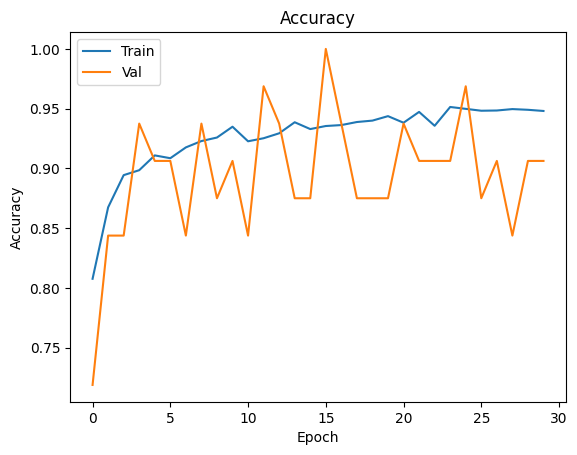

In [31]:
# Visualisation accuracy model2
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

20/20 [==============================] - 5s 226ms/step


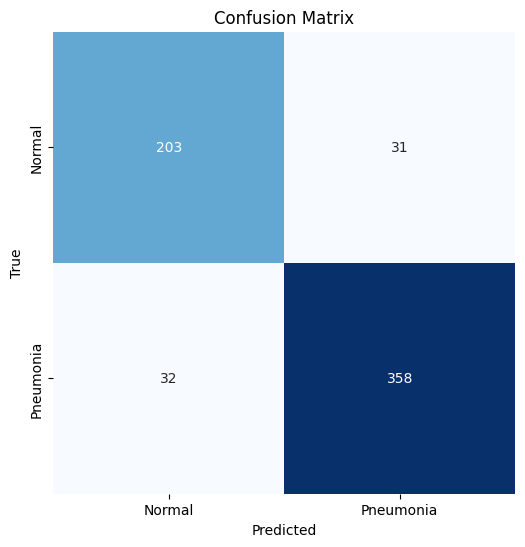

In [ ]:
predictions3 = model2.predict(test_generator)
y_pred = (predictions3 > 0.5).astype(int)

# print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

le meme model2 mais avec unfi de 30 epoques:

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

print_val_acc = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"val_accuracy: {logs['val_accuracy']}"))

history4 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=1,
    class_weight=class_weights,
    verbose=2, #verbose pour afficher la sortie (2 pour plus de détails)
    callbacks=[print_val_acc]  # Ajout du callback
)


Epoch 1/30
val_accuracy: 0.75
163/163 - 70s - loss: 0.1803 - accuracy: 0.9296 - val_loss: 0.3769 - val_accuracy: 0.7500 - 70s/epoch - 428ms/step
Epoch 2/30
val_accuracy: 1.0
163/163 - 70s - loss: 0.1730 - accuracy: 0.9310 - val_loss: 0.2050 - val_accuracy: 1.0000 - 70s/epoch - 430ms/step
Epoch 3/30
val_accuracy: 0.9375
163/163 - 68s - loss: 0.1650 - accuracy: 0.9352 - val_loss: 0.2949 - val_accuracy: 0.9375 - 68s/epoch - 415ms/step
Epoch 4/30
val_accuracy: 0.875
163/163 - 69s - loss: 0.1670 - accuracy: 0.9352 - val_loss: 0.2827 - val_accuracy: 0.8750 - 69s/epoch - 425ms/step
Epoch 5/30
val_accuracy: 0.875
163/163 - 65s - loss: 0.1647 - accuracy: 0.9337 - val_loss: 0.2618 - val_accuracy: 0.8750 - 65s/epoch - 398ms/step
Epoch 6/30
val_accuracy: 0.75
163/163 - 66s - loss: 0.1685 - accuracy: 0.9335 - val_loss: 0.3957 - val_accuracy: 0.7500 - 66s/epoch - 402ms/step
Epoch 7/30
val_accuracy: 0.8125
163/163 - 67s - loss: 0.1722 - accuracy: 0.9312 - val_loss: 0.3124 - val_accuracy: 0.8125 - 67s

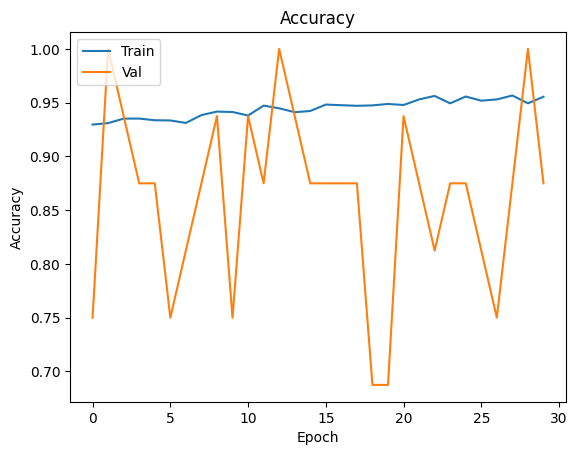

In [ ]:
# Visualisation
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

20/20 [==============================] - 5s 212ms/step


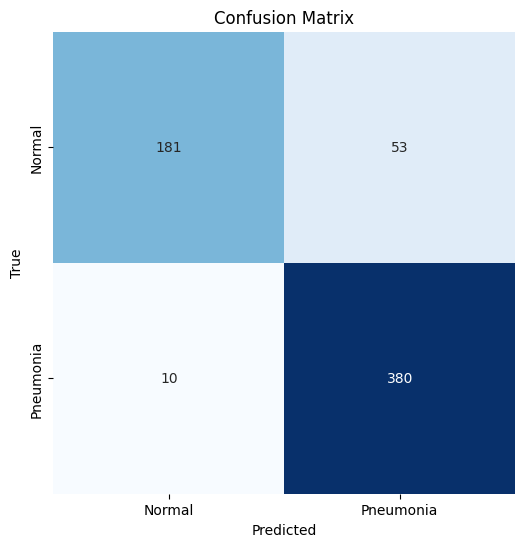

In [ ]:
predictions4 = model2.predict(test_generator)
y_pred = (predictions4 > 0.5).astype(int)

# print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

y_true = test_generator.classes  # model2 history3 avec augmentation du dataset val par des images extraites physiquement du dataset train.

y_pred = model2.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Calcul de la précision
accuracy = accuracy_score(y_true, y_pred)

# Calcul du rappel (sensibilité)
recall = recall_score(y_true, y_pred)

# Calcul de la précision
precision = precision_score(y_true, y_pred)

# Calcul du score F1
f1 = f1_score(y_true, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')




20/20 [==============================] - 5s 228ms/step
Accuracy: 0.8990384615384616
Recall: 0.9743589743589743
Precision: 0.8775981524249422
F1 Score: 0.9234507897934385


In [32]:
y_true = test_generator.classes

y_pred = model2.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Calcul de la précision
accuracy = accuracy_score(y_true, y_pred)

# Calcul du rappel (sensibilité)
recall = recall_score(y_true, y_pred)

# Calcul de la précision
precision = precision_score(y_true, y_pred)

# Calcul du score F1
f1 = f1_score(y_true, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

20/20 [==============================] - 5s 222ms/step
Accuracy: 0.8846153846153846
Recall: 0.9743589743589743
Precision: 0.8597285067873304
F1 Score: 0.9134615384615383


# Sauvegarde des models

In [ ]:
# Sauvegarder le modèle de prediction: model2 avec equilibrage et augmentation
model.save('model2_pneumonia.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
# Sauvegarde du model de prediction 'pneumonie' model2 (avec augmentation et équilibrage des classes et augmentation du dataset 'validation',ccuracy: 89,90%, val_accuracy: 87,8% )
model2.save('pnemonia_model2.h5')

# Choix du modèle:
Comme il s'agit d'une application médicale, la précision de test doit être interprétée avec précaution. En raison de l'importance des prédictions correctes, des métriques supplémentaires telles que la sensibilité, la spécificité, et le score F1(moyenne harmonique de la précision et du rappel) sont souvent utilisées pour avoir une compréhension plus complète de la performance du modèle. La précision seule pourrait ne pas capturer l'importance de faux positifs ou de faux négatifs, qui peuvent avoir des conséquences graves dans les applications médicales.

**INTERPRETATION: **

Accuracy : 89.9%

L'accuracy est le pourcentage total de prédictions correctes par rapport à toutes les prédictions faites. L'accuracy de 89,9 % indique que le modèle a correctement prédit la présence ou l'absence de pneumonie dans environ 89,9 % des cas de l'ensemble de test. C'est généralement une bonne performance, mais cette mesure seule peut être trompeuse si les classes sont déséquilibrées (c'est-à-dire si l'un des deux résultats est beaucoup plus fréquent).

Sensibilité (Recall) : 97.4%

Le Recall est la capacité du modèle à trouver tous les cas positifs pertinents dans les données. Pour la détection de la pneumonie, cela signifie que le modèle a identifié 97,4 % des cas réels de pneumonie. Cela indique une forte sensibilité du modèle, c'est-à-dire qu'il est très bon pour détecter les patients qui ont réellement la pneumonie.

Précision : 87.8%

La précision est la proportion de prédictions positives qui sont réellement correctes. Ici, lorsque le modèle prédit la pneumonie, il est correct 87,8 % du temps. Bien que ce soit un chiffre relativement élevé, il y a encore une marge d'amélioration, car cela signifie que 12,2 % des patients diagnostiqués par le modèle comme ayant une pneumonie ne l'ont pas réellement (faux positifs).

Score F1 : 92.3%

Le score F1 est la moyenne harmonique de la précision et du rappel. Il est particulièrement utile lorsque les classes sont déséquilibrées et qui peuvent rendre la précision ou le rappel seuls trompeurs. Un score F1 de 92,3 % indique un bon équilibre entre la précision et le rappel.

Dans l'ensemble, ces métriques suggèrent que le modèle est assez performant pour détecter la pneumonie, avec une capacité particulièrement forte à identifier correctement la majorité des cas réels de pneumonie (comme le montre le rappel élevé). Cependant, il y a encore une certaine quantité de faux positifs, comme le montre la précision. Dans un contexte médical, il est crucial d'examiner la signification clinique des faux positifs et des faux négatifs. Par exemple, un faux positif pourrait conduire à des tests supplémentaires inutiles, tandis qu'un faux négatif pourrait signifier qu'un cas de pneumonie est manqué, ce qui pourrait avoir des conséquences graves pour le patient.

# Deuxième classification:
Nous allons maintenant utiliser les résultats de classification précédente correspondant au modèle choisi afin d'affiner le diagnostic s'il est postif(pneumonie), ainsi préciser de quelle type de pneumonie s'agit-il, bacterienne ou virale.

Les images de pneumonie sont différenciées par leur nom (indiquant si elles sont bactériennes ou virales) mais sont stockées dans le même dossier, nous allons organiser ces images en sous-dossiers séparés avant de pouvoir utiliser le générateur flow_from_directory pour la classification multiclasse.

In [7]:

import shutil

def organise_pneumonia_images(data):

    pneumonia_dir = os.path.join('./chest_xray', data, 'PNEUMONIA')

    # Créer des sous-dossiers pour bactérienne et virale
    bacterial_dir = os.path.join(pneumonia_dir, 'BACTERIA')
    viral_dir = os.path.join(pneumonia_dir, 'VIRUS')
    if not os.path.exists(bacterial_dir):
        os.makedirs(bacterial_dir)
    if not os.path.exists(viral_dir):
        os.makedirs(viral_dir)

    # Trier les images
    for filename in os.listdir(pneumonia_dir):
        if 'bacteria' in filename:
            shutil.move(os.path.join(pneumonia_dir, filename), bacterial_dir)
        elif 'virus'  in filename or 'Viral' in filename:
            shutil.move(os.path.join(pneumonia_dir, filename), viral_dir)




In [8]:
# Appeler la fonction pour les ensembles de train, validation et test
organise_pneumonia_images('train')
organise_pneumonia_images('val')
organise_pneumonia_images('test')

# Prévisualistaion

In [11]:
train_data_dir = './chest_xray/train/PNEUMONIA'
validation_data_dir = './chest_xray/val/PNEUMONIA'
test_data_dir = './chest_xray/test/PNEUMONIA'

train_bacteria = len(os.listdir(os.path.join(train_data_dir, "BACTERIA")))
train_virus = len(os.listdir(os.path.join(train_data_dir, "VIRUS")))

validation_bacteria = len(os.listdir(os.path.join(validation_data_dir, "BACTERIA")))
validation_virus = len(os.listdir(os.path.join(validation_data_dir, "VIRUS")))

test_bacteria = len(os.listdir(os.path.join(test_data_dir, "BACTERIA")))
test_virus = len(os.listdir(os.path.join(test_data_dir, "VIRUS")))

<function matplotlib.pyplot.show(close=None, block=None)>

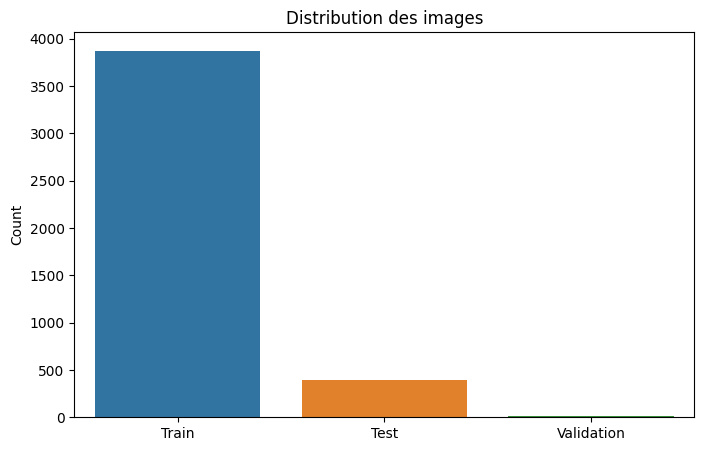

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Train", "Test", "Validation"], y=[train_bacteria + train_virus, test_bacteria + test_virus, validation_bacteria + validation_virus])
plt.title("Distribution des images")
plt.ylabel("Count")
plt.show

On remarque qu'il y a très peu d'images de validation. Nous allons certainement l'enrichir.

<function matplotlib.pyplot.show(close=None, block=None)>

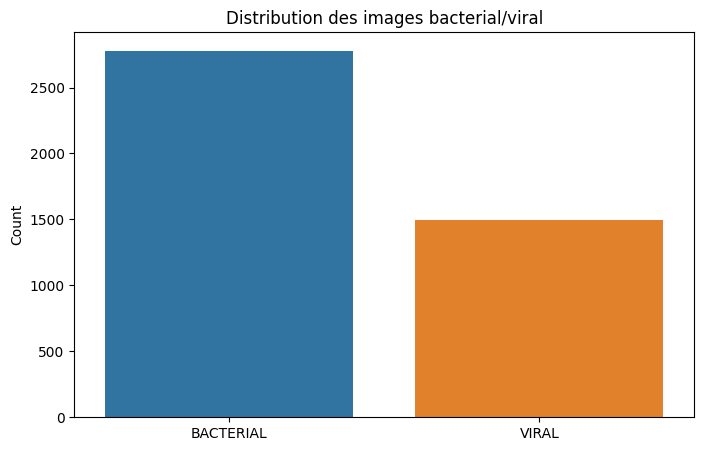

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["BACTERIAL", "VIRAL"], y=[train_bacteria+ test_bacteria+ validation_bacteria, train_virus + test_virus + validation_virus])
plt.title("Distribution des images bacterial/viral")
plt.ylabel("Count")
plt.show

Le dataset est déséquilibré. la classe "VIRAL" est moins représentée. Ce qui nous amènera à balancer les classes en ajustant le poids calculé.

**Visualisation d'images**

In [ ]:
# On copie les images de la classe "VIRAL" dans une liste à partir du sous-dossier VIRUS de train pour afficher
# quelques images aleatoirement.

from PIL import Image
bacterial_dir = os.path.join(train_data_dir, 'BACTERIA')
viral_dir = os.path.join(train_data_dir, 'VIRUS')

train_viral_liste = []


for image_file in os.listdir(viral_dir):
    image_path = os.path.join(viral_dir, image_file)  # Utilisez train_viral_dir ici
    with Image.open(image_path) as img:
        train_viral_liste.append(img.copy())  # Ajoutez l'image à la liste



In [ ]:
train_bacterial_liste = []

for image_file in os.listdir(bacterial_dir):
    image_path = os.path.join(bacterial_dir, image_file)  # Utilisez train_viral_dir ici
    with Image.open(image_path) as img:
        train_bacterial_liste.append(img.copy())  # Ajoutez l'image à la liste



Quelques images du dossier train:

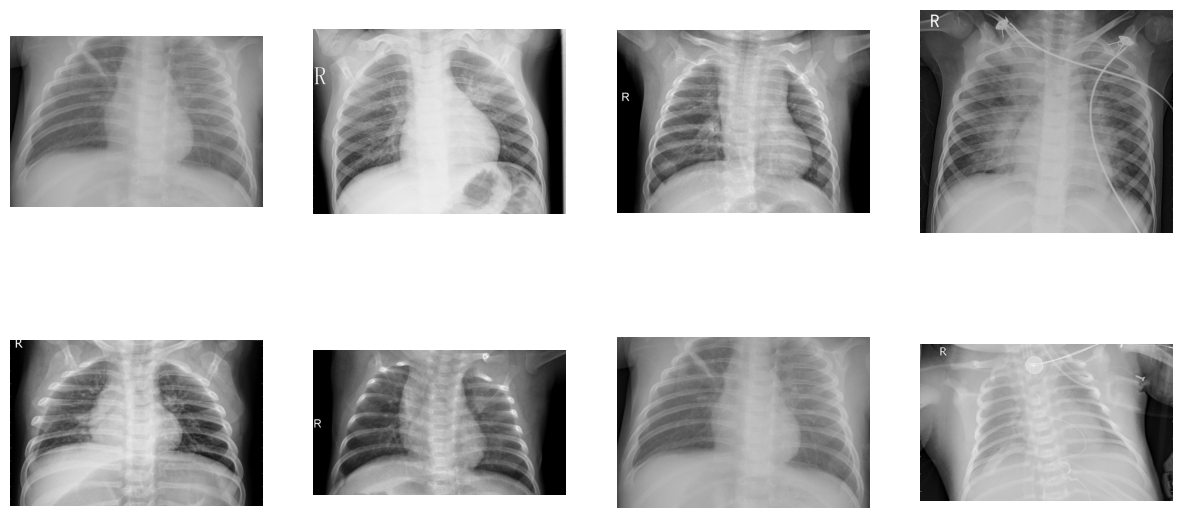

In [ ]:
plt.figure(figsize=(15,15))

for n in range(8):
    index = np.random.randint(0, len(train_viral_liste))
    plt.subplot(4, 4, n+1)
    plt.imshow(train_viral_liste[index], cmap='gray')
    plt.axis("off")
plt.show()

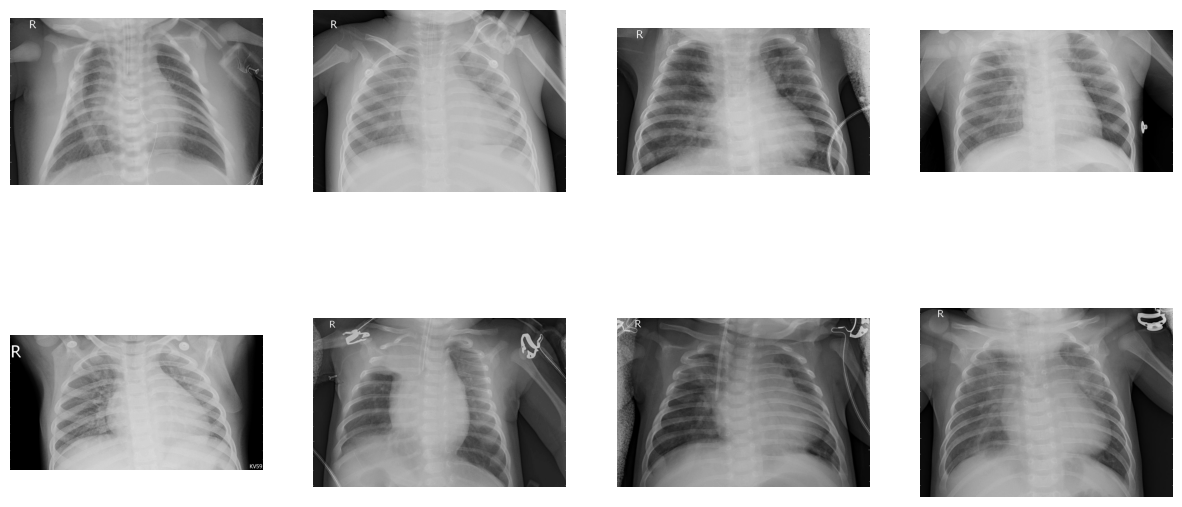

In [ ]:
# visualiser quelques images bacetrial pneumonia:

plt.figure(figsize=(15,15))

for n in range(8):
    index = np.random.randint(0, len(train_bacterial_liste))  # Génère un indice aléatoire
    plt.subplot(4, 4, n+1)
    plt.imshow(train_bacterial_liste[index], cmap='gray')  # Affiche l'image à l'indice aléatoire
    plt.axis("off")
plt.show()

# Visualiser les images ajoutées au dossier validation

In [44]:
viral_dir_val = os.path.join(validation_data_dir,'VIRUS')
validation_viral_liste = []

for image_file in os.listdir(viral_dir_val):
    image_path = os.path.join(viral_dir_val, image_file)  # Utilisez train_viral_dir ici
    with Image.open(image_path) as img:
        validation_viral_liste.append(img.copy())  # Ajoutez l'image à la liste

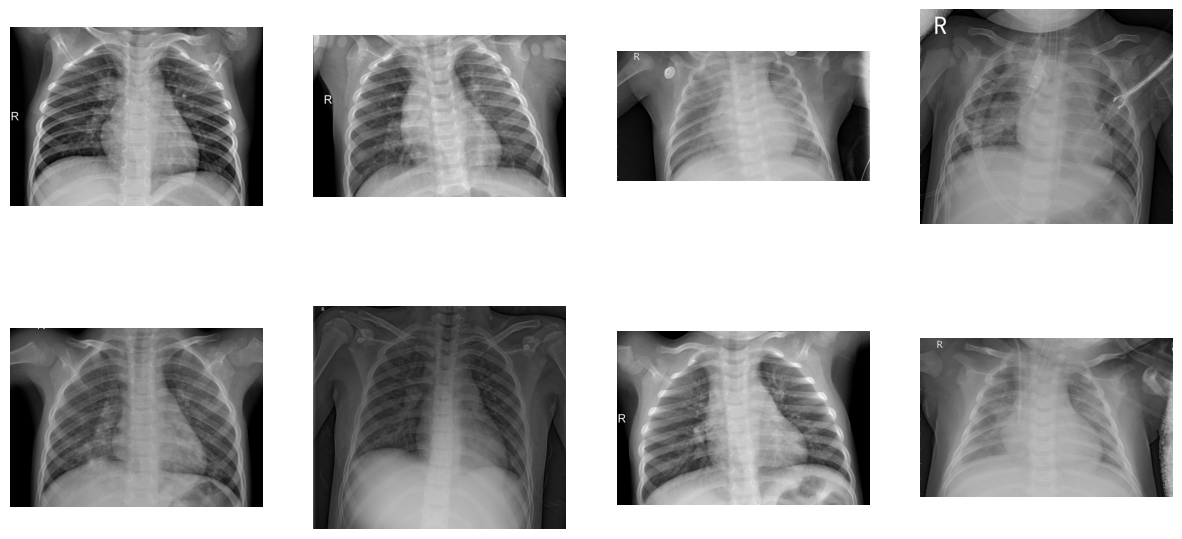

In [45]:
plt.figure(figsize=(15,15))

for n in range(8):
    index = np.random.randint(0, len(validation_viral_liste))  # G
    plt.subplot(4, 4, n+1)
    plt.imshow(validation_viral_liste[index], cmap='gray')
    plt.axis("off")
plt.show()

In [13]:
# Définition des paramètres du modèle de la deuxième classification

class_names = ['BACTERIAL', 'VIRAL']
nb_classes = len(class_names)
epochs = 50
batch_size = 16
image_size = (128, 128)

In [15]:
# ce code évite les erreurs si l'image en entrée n'est pas dans le bon format
if tf.keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, image_size[0], image_size[1])
else:
    input_shape = (image_size[0], image_size[1], 3)


In [16]:

# Construction du modèle
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=input_shape))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [39]:
# Configuration des générateurs d'images

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False ) #ne pas mélanger l'ordre des images afin de faciliter la vérification


Found 3875 images belonging to 2 classes.
Found 18 images belonging to 3 classes.
Found 390 images belonging to 2 classes.


In [38]:
train_generator.reset()

In [18]:
# equilibrer les classes
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

In [81]:
class_weights

{0: 0.7643884892086331, 1: 1.445578231292517}

In [ ]:
# Entraînement du modèle
# history5 = model3.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size)


from tensorflow.keras.callbacks import LambdaCallback

print_val_acc = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"val_accuracy: {logs['val_accuracy']}"))

history5 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=1,
    class_weight=class_weights,
    verbose=2, #verbose pour afficher la sortie (2 pour plus de détails)
    callbacks=[print_val_acc]  # Ajout du callback
)

Epoch 1/50
val_accuracy: 0.5625
242/242 - 36s - loss: 0.4912 - accuracy: 0.7676 - val_loss: 1.0258 - val_accuracy: 0.5625 - 36s/epoch - 147ms/step
Epoch 2/50
val_accuracy: 0.5625
242/242 - 35s - loss: 0.4717 - accuracy: 0.7707 - val_loss: 1.0334 - val_accuracy: 0.5625 - 35s/epoch - 144ms/step
Epoch 3/50
val_accuracy: 0.5625
242/242 - 35s - loss: 0.4733 - accuracy: 0.7673 - val_loss: 1.0285 - val_accuracy: 0.5625 - 35s/epoch - 145ms/step
Epoch 4/50
val_accuracy: 0.625
242/242 - 36s - loss: 0.4845 - accuracy: 0.7673 - val_loss: 0.9084 - val_accuracy: 0.6250 - 36s/epoch - 149ms/step
Epoch 5/50
val_accuracy: 0.625
242/242 - 35s - loss: 0.4742 - accuracy: 0.7740 - val_loss: 0.9374 - val_accuracy: 0.6250 - 35s/epoch - 144ms/step
Epoch 6/50
val_accuracy: 0.5625
242/242 - 35s - loss: 0.4759 - accuracy: 0.7738 - val_loss: 1.0388 - val_accuracy: 0.5625 - 35s/epoch - 144ms/step
Epoch 7/50
val_accuracy: 0.5625
242/242 - 35s - loss: 0.4699 - accuracy: 0.7725 - val_loss: 1.0220 - val_accuracy: 0.562

In [ ]:

# Sauvegarde du modèle
model3.save('modele_classification_pneumonia.h5')

Le model3 avec l'augmentation et les paramètres associés semble ne pas capter la complexité de cette deuxieme classification(Bacterial/Viral).
Nous allons construire un nouveau model avec une architecture plus ou moins complexe, une augmentation plus ou moins enrichie, y ajouter plus de couches neuronales, un 'early stopping', ainsi qu'une régularisation L2 sur les couches denses pour pénaliser les poids de grande amplitude et potentiellement réduire le surajustement(overfitting)..

In [ ]:
# augmentation des données avec rotation_range et width/height shift range

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,  # Rotation aléatoire des images dans la plage (degrés, 0 à 180)
    width_shift_range=0.2,  # Translation horizontale aléatoire des images (fraction de la largeur totale)
    height_shift_range=0.2,  # Translation verticale aléatoire des images (fraction de la hauteur totale)
    shear_range=0.2,  # Application d'un cisaillement aléatoire
    zoom_range=0.2,  # Zoom aléatoire à l'intérieur des images
    horizontal_flip=True,  # Retournement aléatoire des images horizontalement
    fill_mode='nearest'  # Rremplir les pixels nouvellement créés
)

# Batch Normalization et de régularisation L2 dans l'architecture du modèle
from tensorflow.keras.regularizers import l2

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_regularizer=l2(0.001)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.001)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(64, kernel_regularizer=l2(0.001)))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1))
model4.add(Activation('sigmoid'))

model4.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint pour sauvegarder le meilleur modèle pendant l'entraînement
checkpoint = ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True)

# EarlyStopping pour arrêter l'entraînement lorsque la val_accuracy cesse de s'améliorer
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

# Entraînement du modèle avec les callbacks
history6 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/50
242/242 [==============================] - ETA: 0s - loss: 0.7418 - accuracy: 0.4594
Epoch 1: val_loss improved from inf to 0.71157, saving model to best_model.h5
242/242 [==============================] - 37s 149ms/step - loss: 0.7418 - accuracy: 0.4594 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 2/50
242/242 [==============================] - ETA: 0s - loss: 0.7051 - accuracy: 0.3465
Epoch 2: val_loss improved from 0.71157 to 0.70115, saving model to best_model.h5
242/242 [==============================] - 36s 150ms/step - loss: 0.7051 - accuracy: 0.3465 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 3/50
242/242 [==============================] - ETA: 0s - loss: 0.6986 - accuracy: 0.3799
Epoch 3: val_loss improved from 0.70115 to 0.69737, saving model to best_model.h5
242/242 [==============================] - 35s 146ms/step - loss: 0.6986 - accuracy: 0.3799 - val_loss: 0.6974 - val_accuracy: 0.4375
Epoch 4/50
242/242 [==============================] - ETA: 0s - loss

# Analyse d'erreurs sur le model3:

Visualisation des images où laprédiction a echoué:

1/1 [==============================] - 0s 22ms/step


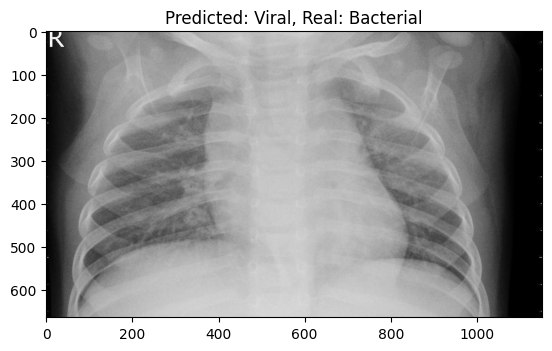

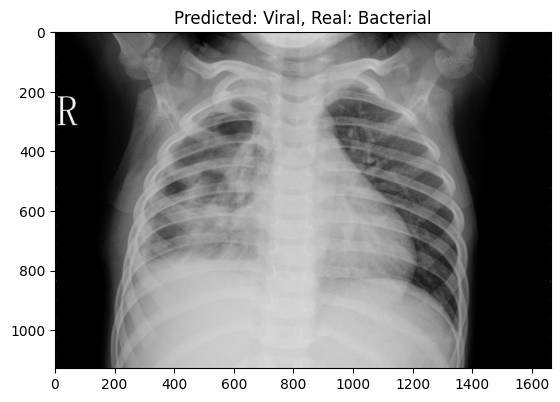

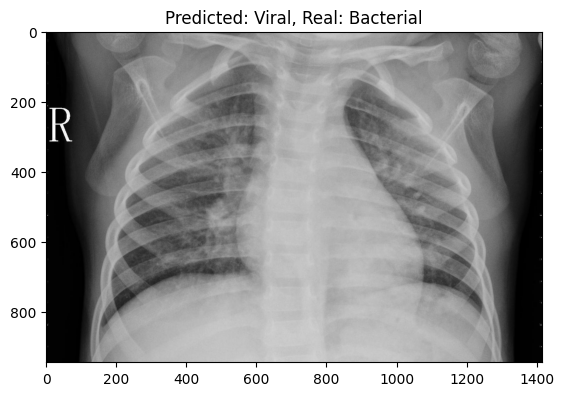

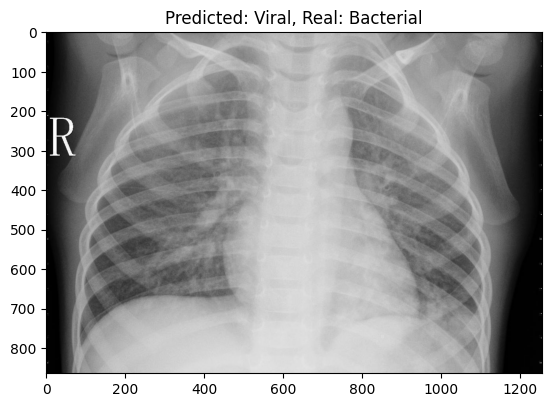

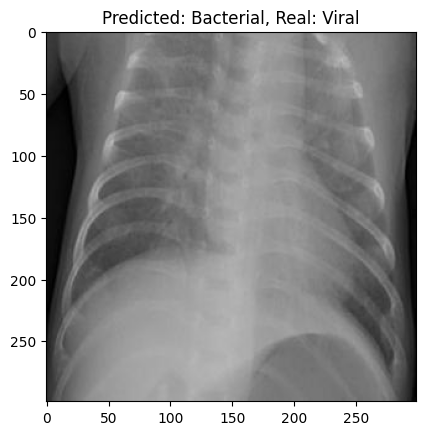

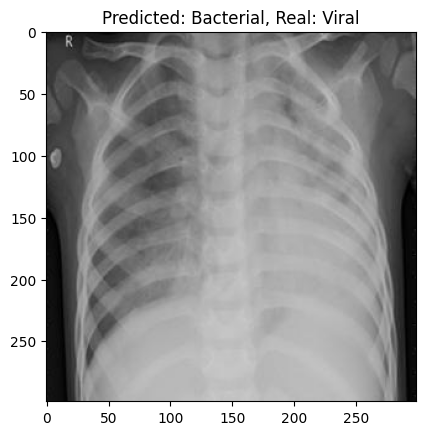

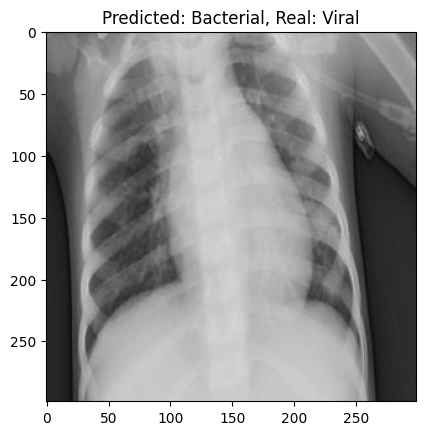

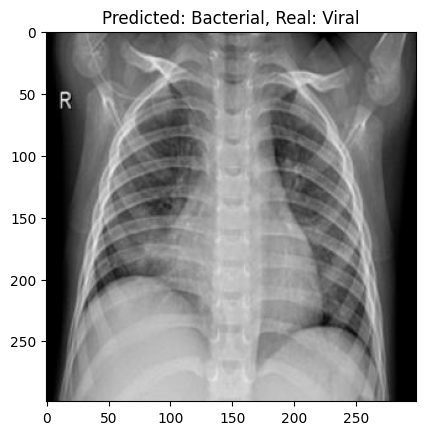

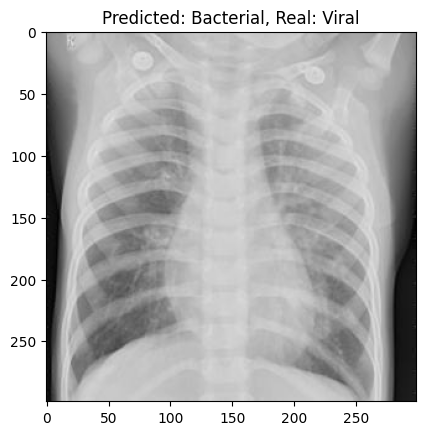

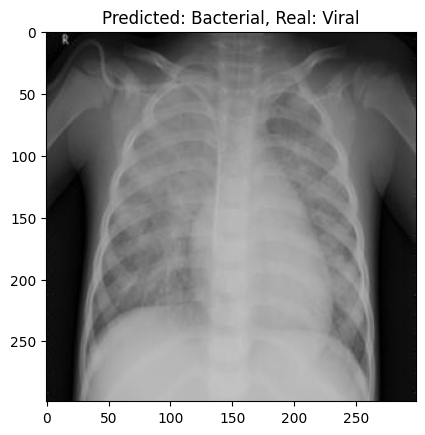

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Chemin vers le modèle sauvegardé et le dossier de validation
model_path = './modele_classification_pneumonia_enrichi.h5' # model4

model = load_model(model_path)

# Taille des images attendue par le modèle
image_size = (128, 128)

def load_and_preprocess_image(file_path, target_size=image_size):
    # Charger l'image avec PIL
    img = Image.open(file_path)
    img = img.resize(target_size)
    img = np.array(img)
    # Si l'image est en niveaux de gris (1 canal), la convertir en RGB (3 canaux)
    if img.ndim == 2:
        img = np.stack((img,) * 3, axis=-1)
    #  rescaling si necessaire
    img = img / 255.0
    # Ajouter une dimension de batch
    img = np.expand_dims(img, axis=0)
    return img


# Charger et prédire sur toutes les images dans le dossier de validation
predictions = []
true_labels = []
image_paths = []

subfolders = ['BACTERIA', 'VIRUS']

for subfolder in subfolders:
    folder_path = os.path.join(validation_data_dir, subfolder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):  # Vérifier si c'est un fichier et non un répertoire
            true_label = 0 if subfolder == 'BACTERIA' else 1  # 0 pour bactérial, 1 pour viral
            img_array = load_and_preprocess_image(file_path)  # Refaire le même traitement d'image que le génerateur a appliqué en entrée.

            prediction = model.predict(img_array)

            predictions.append(prediction[0][0])
            true_labels.append(true_label)
            image_paths.append(file_path)


# Convertir les listes en tableaux numpy pour une manipulation facile
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Trouver les indices des prédictions incorrectes
incorrect_indices = np.where((predictions > 0.5).astype('int32') != true_labels)[0]

# Visualiser les erreurs
for index in incorrect_indices:
    img = Image.open(image_paths[index])
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {"Viral" if predictions[index] > 0.5 else "Bacterial"}, Real: {"Viral" if true_labels[index] == 1 else "Bacterial"}')
    plt.show()


# Essai d'un nouveau model avec Optimizer = rmsprop
RMSprop (Root Mean Square Propagation) ajuste le taux d'apprentissage de manière adaptative pour chaque paramètre en divisant le taux d'apprentissage pour un poids par une moyenne mobile décroissante du carré des gradients.

In [ ]:
# augmentation des données avec rotation_range et width/height shift range

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,

)

from tensorflow.keras.layers import BatchNormalization
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='softmax'))

model5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 61, 61, 64)      

In [50]:
# Afin d'éviter le surajustement on arrete l'entrainement après 10 epochs lorsque la val_accuracy cesse de s'améliorer
# On réduit le pas d'apprentissage lorsque l'accuracy n'augmente pas apres 2 steps

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

# ModelCheckpoint pour sauvegarder le meilleur modèle pendant l'entraînement
checkpoint = ModelCheckpoint('best_model2.h5', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

callbacks = [checkpoint, learning_rate_reduction, early_stopping]

In [ ]:
#

history7 = model5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=1,
    callbacks= callbacks
)

Epoch 1/50
242/242 [==============================] - ETA: 0s - loss: 0.8603 - accuracy: 0.3465
Epoch 1: val_loss improved from inf to 2.26763, saving model to best_model2.h5
242/242 [==============================] - 42s 166ms/step - loss: 0.8603 - accuracy: 0.3465 - val_loss: 2.2676 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
242/242 [==============================] - ETA: 0s - loss: 0.7299 - accuracy: 0.3467
Epoch 2: val_loss improved from 2.26763 to 0.76565, saving model to best_model2.h5
242/242 [==============================] - 40s 164ms/step - loss: 0.7299 - accuracy: 0.3467 - val_loss: 0.7657 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/50
242/242 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.3480
Epoch 3: val_loss did not improve from 0.76565
242/242 [==============================] - 40s 165ms/step - loss: 0.6778 - accuracy: 0.3480 - val_loss: 1.0434 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/50
242/242 [==============================] - ETA: 0s 

# Analyse d'erreur: verification du format des images ajouées au dataset validation


In [ ]:
from PIL import Image

# Charger l'image
img = Image.open('./chest_xray/val/PNEUMONIA/VIRUS/Viral Pneumonia-10.png')

# Obtenir le mode de l'image
print(img.mode)  # 'RGB' pour les images en couleur à 3 canaux, 'L' pour les images en niveaux de gris


L


# Convertir en mode RGB
le mode des images ajoutées est 'L', l'image est en niveaux de gris à un seul canal.
Solution: convertir toutes les images ajoutées en mode RGB.

In [36]:
# convertir le mode des images ajoutées en format RGB
from PIL import Image

def convert_to_rgb(image_path, save_path=None):
    """
    Convertit une image en niveaux de gris (L) au format RGB.

    image_path: Chemin de l'image à convertir.
    save_path: Chemin où enregistrer l'image convertie (facultatif).
    return: Une image PIL en mode RGB.
    """
    # Charger l'image en niveaux de gris
    image = Image.open(image_path)

    # Convertir l'image en mode RGB
    rgb_image = image.convert('RGB')

    # Enregistrer l'image
    if save_path:
        rgb_image.save(save_path, format='JPEG')

    return rgb_image


# Convertir toutes les images du dossier de validation en RGB
for subfolder in ['BACTERIA', 'VIRUS']:
    folder_path = os.path.join(validation_data_dir, subfolder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            save_path = os.path.join(folder_path, filename)
            convert_to_rgb(file_path, save_path)


# Relancer le fit des models après correction du format des images de validation:

In [ ]:
#
history8 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=1,
    class_weight=class_weights,
    callbacks= callbacks
)



Epoch 1/30
242/242 [==============================] - ETA: 0s - loss: 0.5301 - accuracy: 0.7657
Epoch 1: val_loss did not improve from 0.77355
242/242 [==============================] - 35s 146ms/step - loss: 0.5301 - accuracy: 0.7657 - val_loss: 1.0458 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
242/242 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.7585
Epoch 2: val_loss did not improve from 0.77355
242/242 [==============================] - 35s 146ms/step - loss: 0.5156 - accuracy: 0.7585 - val_loss: 0.9311 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/30
242/242 [==============================] - ETA: 0s - loss: 0.5167 - accuracy: 0.7600
Epoch 3: val_loss did not improve from 0.77355
242/242 [==============================] - 35s 146ms/step - loss: 0.5167 - accuracy: 0.7600 - val_loss: 0.9153 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/30
242/242 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.7536
Epoch 4: val_loss did not improve 

# Evaluation des nouveaux models:

In [ ]:
y_true = test_generator.classes  # étiquettes réelles

y_pred = model5.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Calcul de la précision
accuracy = accuracy_score(y_true, y_pred)

# Calcul du rappel (sensibilité)
recall = recall_score(y_true, y_pred)

# Calcul de la précision
precision = precision_score(y_true, y_pred)

# Calcul du score F1
f1 = f1_score(y_true, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

25/25 [==============================] - 2s 77ms/step
Accuracy: 0.37948717948717947
Recall: 1.0
Precision: 0.37948717948717947
F1 Score: 0.550185873605948


In [ ]:
y_true = test_generator.classes  # étiquettes réelles

y_pred = model4.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Calcul de la précision
accuracy = accuracy_score(y_true, y_pred)

# Calcul du rappel (sensibilité)
recall = recall_score(y_true, y_pred)

# Calcul de la précision
precision = precision_score(y_true, y_pred)

# Calcul du score F1
f1 = f1_score(y_true, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

25/25 [==============================] - 2s 74ms/step
Accuracy: 0.37948717948717947
Recall: 1.0
Precision: 0.37948717948717947
F1 Score: 0.550185873605948


In [ ]:
y_true = test_generator.classes  # étiquettes réelles

y_pred = model3.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Calcul de la précision
accuracy = accuracy_score(y_true, y_pred)

# Calcul du rappel (sensibilité)
recall = recall_score(y_true, y_pred)

# Calcul de la précision
precision = precision_score(y_true, y_pred)

# Calcul du score F1
f1 = f1_score(y_true, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

25/25 [==============================] - 2s 73ms/step
Accuracy: 0.9256410256410257
Recall: 0.8918918918918919
Precision: 0.9103448275862069
F1 Score: 0.901023890784983


In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                 

# Conclusion: Choix du modèle
Le modèle avec une architechture trop complexe (model4) semble être non adapté au sujet de pédiction.
L'augmentation trop enrichie du modèle4 semble aussi fausser les résultats de prédictions.
Seul le modèle3 avec une augmentation modérée et une architecture pas trop dense et Adam comme optimizer, peut étre sélectionné.

Effectivement, les metriques calculées donnent une bonne idée de la performance du modèle. L'accuracy 92,56% indique une bonne performance globale, tandis que le rappel élevé(89%) montre que le modèle est assez bon pour détecter la majorité des cas positifs réels. La précision de 91% indique que la majorité des prédictions positives du modèle sont correctes, et un score F1 élevé (90%) confirme que le modèle atteint un bon équilibre entre le rappel et la précision.

In [ ]:
# Sauvegarde du modèle
model3.save('modele_classification_pneumonia_conv_RGB.h5')

# Evaluation et Prediction avec le model3:

1/1 [==============================] - 0s 23ms/step


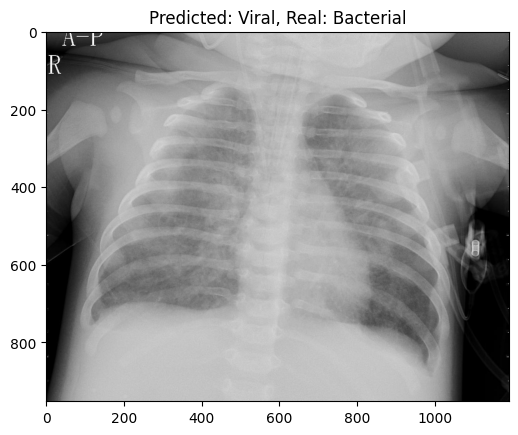

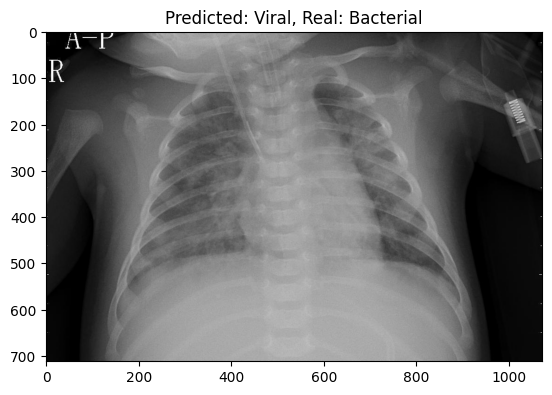

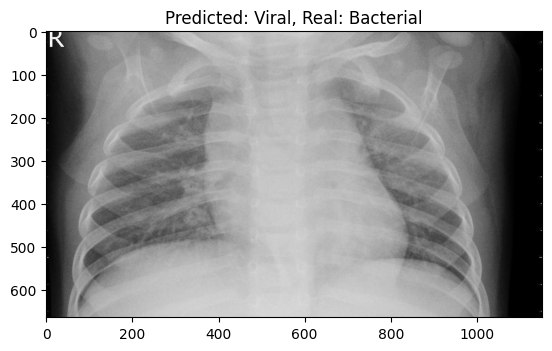

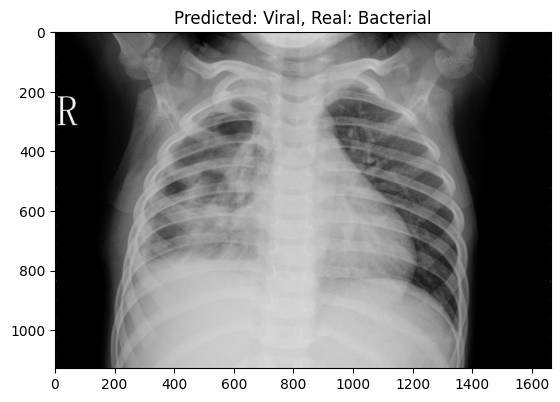

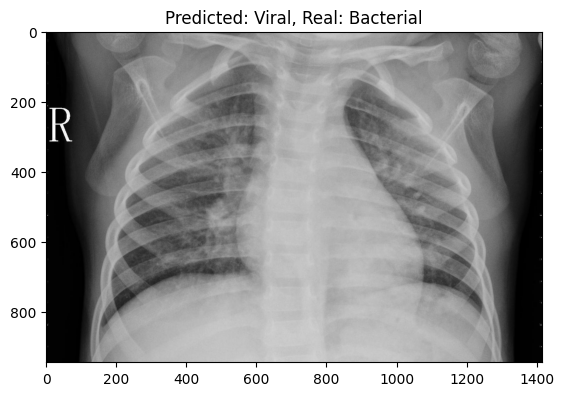

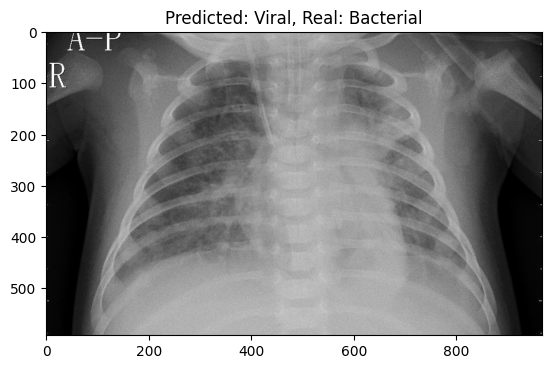

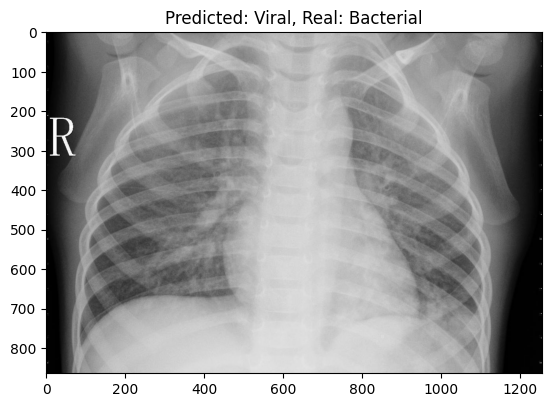

In [ ]:
from PIL import Image

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import  img_to_array

# Chemin vers le modèle sauvegardé et le dossier de validation
model_path = './modele_classification_pneumonia.h5' # model4

model = load_model(model_path)

# Taille des images attendue par le modèle
image_size = (128, 128)

def load_and_preprocess_image(file_path, target_size=image_size):
    # Charger l'image avec PIL
    img = Image.open(file_path)
    img = img.resize(target_size)
    img = np.array(img)
    # Si l'image est en niveaux de gris (1 canal), la convertir en RGB (3 canaux)
    if img.ndim == 2:
        img = np.stack((img,) * 3, axis=-1)
    #  rescaling si necessaire
    img = img / 255.0
    # Ajouter une dimension de batch
    img = np.expand_dims(img, axis=0)
    return img


# Charger et prédire sur toutes les images dans le dossier de validation
predictions = []
true_labels = []
image_paths = []

subfolders = ['BACTERIA', 'VIRUS']

for subfolder in subfolders:
    folder_path = os.path.join(validation_data_dir, subfolder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):  # Vérifier si c'est un fichier et non un répertoire
            true_label = 0 if subfolder == 'BACTERIA' else 1  # 0 pour bactérial, 1 pour viral
            img_array = load_and_preprocess_image(file_path)  # Refaire le même traitement d'image que le génerateur a appliqué en entrée.

            prediction = model.predict(img_array)

            predictions.append(prediction[0][0])
            true_labels.append(true_label)
            image_paths.append(file_path)


# Convertir les listes en tableaux numpy pour une manipulation facile
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Trouver les indices des prédictions incorrectes
incorrect_indices = np.where((predictions > 0.5).astype('int32') != true_labels)[0]

# Visualiser les erreurs
for index in incorrect_indices:
    img = Image.open(image_paths[index])
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {"Viral" if predictions[index] > 0.5 else "Bacterial"}, Real: {"Viral" if true_labels[index] == 1 else "Bacterial"}')
    plt.show()


In [49]:
accuracy = history7.history['accuracy']
val_accuracy = history7.history['val_accuracy']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, accuracy, 'g', label='Training Accuracy')
plt.plot(numEpochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: ignored

# Recours à ResNet

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Charger le modèle ResNet50 pré-entraîné sans les couches supérieures (fully-connected)
base_model = ResNet50(weights='imagenet', include_top=False)

# Ajoutez des nouvelles couches personnalisées
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Ajoute un pooling pour réduire la dimensionnalité
x = Dense(1024, activation='relu')(x)  # Ajoutez une nouvelle couche fully-connected
predictions = Dense(1, activation='sigmoid')(x)  # Couche de sortie pour classification binaire

# Ceci est le modèle que nous allons entraîner
model_plus_base_resnet = Model(inputs=base_model.input, outputs=predictions)

# Figons les couches du modèle pré-entraîné
for layer in base_model.layers:
    layer.trainable = False






In [30]:

# Compilation du modèle
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Afin d'éviter le surajustement on arrete l'entrainement après 10 epochs lorsque la val_accuracy cesse de s'améliorer
# On réduit le pas d'apprentissage lorsque l'accuracy n'augmente pas apres 2 steps

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.callbacks import LambdaCallback


print_val_acc = LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"val_accuracy: {logs.get('val_accuracy')}"))

# Ensuite, ajoutez le callback à la liste des callbacks lors de l'appel à `fit`
# history9 = model3.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // 32,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // 32,
#     callbacks=[print_val_acc]
# )


# learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
#                                             patience = 2,
#                                             verbose = 1,
#                                             factor = 0.5,
#                                             min_lr = 0.00001)

# # ModelCheckpoint pour sauvegarder le meilleur modèle pendant l'entraînement
# checkpoint = ModelCheckpoint('best_model2.h5', verbose=1, save_best_only=True)

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

# callbacks = [checkpoint, learning_rate_reduction, early_stopping]
# # ModelCheckpoint pour sauvegarder le meilleur modèle pendant l'entraînement
# checkpoint = ModelCheckpoint('best_model_classification2.h5', verbose=1, save_best_only=True)

# # EarlyStopping pour arrêter l'entraînement lorsque la val_accuracy cesse de s'améliorer
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
# checkpoint=

In [35]:

# Entraînement du modèle
history9=model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples //32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=1,
    class_weight=class_weights,
    verbose=2,
    callbacks= [print_val_acc]
)

Epoch 1/30
val_accuracy: None
121/121 - 18s - loss: 0.5893 - accuracy: 0.7061 - 18s/epoch - 149ms/step
Epoch 2/30
val_accuracy: None
121/121 - 18s - loss: 0.5870 - accuracy: 0.7036 - 18s/epoch - 149ms/step
Epoch 3/30
val_accuracy: None
121/121 - 18s - loss: 0.5923 - accuracy: 0.7102 - 18s/epoch - 150ms/step
Epoch 4/30
val_accuracy: None
121/121 - 18s - loss: 0.5787 - accuracy: 0.7145 - 18s/epoch - 149ms/step
Epoch 5/30
val_accuracy: None
121/121 - 18s - loss: 0.5916 - accuracy: 0.7124 - 18s/epoch - 148ms/step
Epoch 6/30
val_accuracy: None
121/121 - 17s - loss: 0.5856 - accuracy: 0.7109 - 17s/epoch - 144ms/step
Epoch 7/30
val_accuracy: None
121/121 - 18s - loss: 0.5916 - accuracy: 0.7062 - 18s/epoch - 145ms/step
Epoch 8/30
val_accuracy: None
121/121 - 18s - loss: 0.5825 - accuracy: 0.7119 - 18s/epoch - 145ms/step
Epoch 9/30
val_accuracy: None
121/121 - 18s - loss: 0.5862 - accuracy: 0.7051 - 18s/epoch - 148ms/step
Epoch 10/30
val_accuracy: None
121/121 - 18s - loss: 0.5678 - accuracy: 0

KeyboardInterrupt: ignored